In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('/kaggle/input/concert-ticket-sales/dataset_10_Concert Ticket Sales.csv')
df.head()

,Date,Product,Region,Customer_Type,Quantity,Price,Discount,Revenue
0,2024-01-17,Jazz Concert,West,Regular,8,266.13,0.01,2107.75
1,2024-11-13,Rock Concert,West,Regular,7,386.10,0.02,2648.65
2,2024-11-16,Jazz Concert,South,VIP,10,115.96,0.12,1020.45
3,2024-03-05,Pop Concert,West,VIP,5,309.50,0.07,1439.18
4,2024-04-26,Classical Concert,South,Regular,10,127.10,0.09,1156.61


In [14]:
df.info()
df.describe()
df.isnull().sum()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


Index(['Date', 'Product', 'Region', 'Customer_Type', 'Quantity', 'Price',
       'Discount', 'Revenue'],
      dtype='object')

In [15]:
df.fillna(df.mean(numeric_only=True),
inplace=True)
df.drop_duplicates(inplace=True)
print("After Cleaning:")
print(df.info())


After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB
None


In [21]:
most_ordered_items = df['Product'].value_counts()
print("Most Ordered Items:\n", most_ordered_items.head())

revenue_by_product = df.groupby('Product')['Revenue'].sum()
print("Revenue by Product:\n", revenue_by_product)

df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' is in datetime format
orders_over_time = df.groupby(df['Date'].dt.date).size()
print("Orders Over Time:\n", orders_over_time)

Most Ordered Items:
 Product
Jazz Concert         267
Rock Concert         258
Pop Concert          240
Classical Concert    235
Name: count, dtype: int64
Revenue by Product:
 Product
Classical Concert    303937.60
Jazz Concert         317758.57
Pop Concert          282377.95
Rock Concert         303905.09
Name: Revenue, dtype: float64
Orders Over Time:
 Date
2024-01-01    2
2024-01-02    4
2024-01-03    2
2024-01-04    3
2024-01-05    1
             ..
2024-12-26    4
2024-12-27    2
2024-12-28    5
2024-12-30    1
2024-12-31    1
Length: 346, dtype: int64


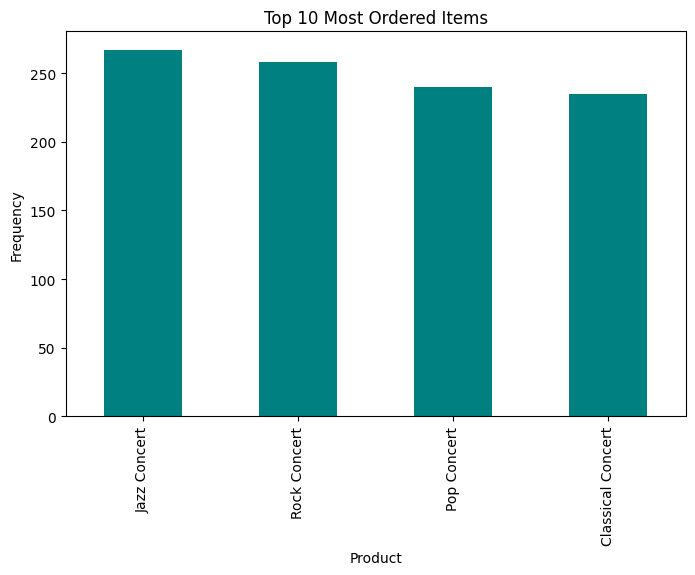

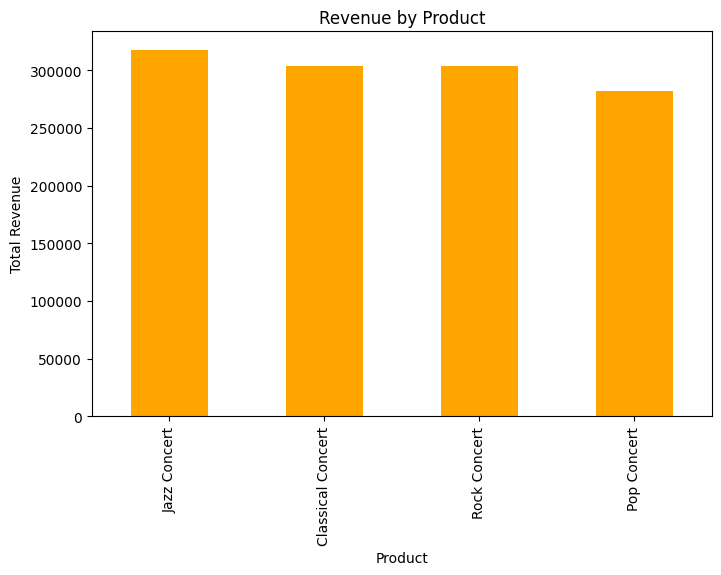

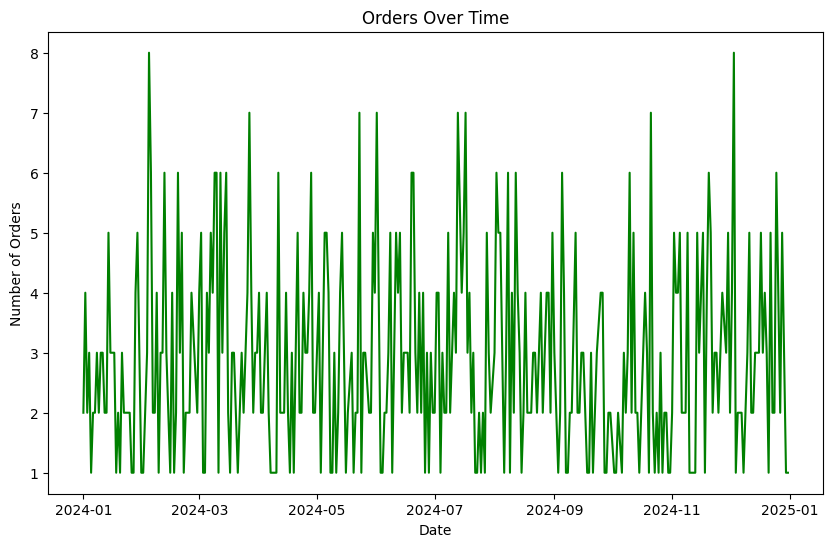

In [22]:
most_ordered_items.head(10).plot(kind='bar', figsize=(8, 5), color='teal')
plt.title("Top 10 Most Ordered Items")
plt.xlabel("Product")
plt.ylabel("Frequency")
plt.show()


revenue_by_product = df.groupby('Product')['Revenue'].sum()
revenue_by_product.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(8, 5), color='orange')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Total Revenue")
plt.show()


orders_over_time.plot(figsize=(10, 6), color='green')
plt.title("Orders Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.show()

In [25]:
print("Conclusions:")
print("- Most ordered products are likely the most popular or in demand.")
print("- Products generating the highest revenue could indicate profitable areas.")
print("- Trends in orders over time could help with demand forecasting and planning.")

Conclusions:
- Most ordered products are likely the most popular or in demand.
- Products generating the highest revenue could indicate profitable areas.
- Trends in orders over time could help with demand forecasting and planning.
